In [1]:

#Imports   
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score  
import pandas as pd   
import numpy as np 
import math   
from numpy import linalg as LA


kernel="gaussian"
lmd=1e-1
gamma=0.1
Gamma_list=np.random.rand(1000)
N=20
bias=1.0
max_iter=100
def init(kernel="gaussian", lmd=1e-1, gamma=0.1,Gamma_list=np.random.rand(1000) , N=20, bias=1.0, max_iter=100):
    if kernel not in kernel_dict:
        print(kernel + " kernel does not exist!\nUse rbf kernel.")
        kernel = "gaussian"
    if kernel == "gaussian":
        def kernel_func(x, y):
            return kernel_dict[kernel](x, y, gamma=gamma)

    if kernel == "randomized":
        def kernel_func(x, y):
            return kernel_dict[kernel](x, y, Gamma_list=Gamma_list , N=N)
    else:
        kernel_func = kernel_dict[kernel]
    kernel = kernel_func
    lmd = lmd
    bias = bias
    max_iter = max_iter

def __linear_kernel(x, y):
    return np.dot(x, y)

def __gaussian_kernel(x, y, gamma):
    diff = x - y
    return np.exp(-gamma * np.dot(diff, diff))


global X_with_bias 
def fit( X, y):
    def update_alpha(alpha, t,X_with_bias):
        data_size, feature_size = np.shape(X_with_bias)
        new_alpha = np.copy(alpha)
        it = np.random.randint(low=0, high=data_size)
        x_it = X_with_bias[it]
        y_it = y[it]
        if (y_it *
            (1. / (lmd * t)) *
            sum([alpha_j * y_it * kernel_dict[kernel](x_it, x_j,gamma)
                 for x_j, alpha_j in zip(X_with_bias, alpha)])) < 1.:
            new_alpha[it] += 1
        return new_alpha

    
    X_with_bias = np.c_[X, np.ones((np.shape(X)[0])) * bias]
    y = y
    alpha = np.zeros((np.shape(X_with_bias)[0], 1))
    for t in range(1, max_iter + 1):
        alpha = update_alpha(alpha, t,X_with_bias)
    alpha = alpha
    return alpha

def decision_function(X):
    X_with_bias = np.c_[X, np.ones((np.shape(X)[0])) * bias]
    y_score = [(1. / (lmd * max_iter)) * sum([alpha_j * y_j * kernel_dict[kernel](x_j, x,gamma) for (x_j, y_j, alpha_j) in zip(X_with_bias, y, alpha)])
               for x in X_with_bias]
    return np.array(y_score)

def predict(X):
    y_score = decision_function(X)
    y_predict = map(lambda s: 1 if s >= 0. else -1, y_score)
    return list(map(int,y_predict))  

def __randomized_kernel(x, y, Gamma_list , N):
    sum=0 
    Samples=np.random.randint([0],[len(Gamma_list)],[N])
    for i in Samples:
        diff=x-y
        sum+=np.exp(-Gamma_list[i]* np.dot(diff, diff))

    sum=sum/N
    return sum



kernel_dict = {"randomized":__randomized_kernel , "linear": __linear_kernel, "gaussian": __gaussian_kernel}

### Close look at the randomized kernel

Gamma_list=np.random.rand(1000)

 

C:\Users\jamal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


La precision est de  0.876


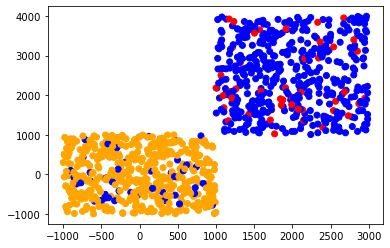

In [2]:
 
## Generate random Data

 

L1=np.random.randint([-1000,-1000,-1],[1000,1000,0],[500,3]) 
L2=np.random.randint([1000,1000,1],[3000,4000,2],[500,3])

C=["red","blue","green","orange"]
dic = {"red": -1, "blue": 1,"green":2,"orange":3}
X_=[]
for i in range (len(L1)):
    X_=X_+[L1[i][0]]
Y_=[]
for i in range (len(L1)):
    Y_=Y_+[L1[i][1]]
Label=[]
for i in range (len(L1)):
    Label=Label+[C[L1[i][2]]]

    
    
    
for i in range (len(L2)):
    X_=X_+[L2[i][0]] 
for i in range (len(L2)):
    Y_=Y_+[L2[i][1]] 
for i in range (len(L2)):
    Label=Label+[C[L2[i][2]]]
    
L_prim=np.concatenate((L1,L2),axis=0)
L=np.concatenate((L1,L2),axis=0)

bruit=np.random.randint(0,500,50)
for x in bruit:
    Label[x]="blue"
    L[x][2]=1
bruit=np.random.randint(500,1000,50)
for x in bruit:
    Label[x]="red"
    L[x][2]=-1
    
plt.scatter(X_, Y_, c=Label)

X=np.array(L[:,:2])
y=[]
for i in range (len(L)):
    y.append(L[i][2])
## Test

### For the randomized kernel  :
### We have chosen a Vector of 10000 gaussian kernel with different parameters therefore :
### We have c=1 , l=2 then for eps = 0.1 and gamma = 0.1 

from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics

#scaling
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
init(kernel="randomized",N=20 , Gamma_list= np.random.rand(10000)) ### we will take just 20 for computation problem
alpha=fit(X, y)
w=[0,0]
for i in range (len(X)):
    w+=y[i]*X[i]*alpha[i]
w0=w
b=bias

min_dis=10000
w=w0/LA.norm(w0)
b_dis=b/LA.norm(w0)
last=[0,0]
for i in range (len(X)):
    if np.abs(w.T.dot(X[i])+b_dis) < min_dis :
        min_dis=np.abs(w.T.dot(X[i]) +b_dis)
        last=X[i]

precision=0
Y_prim=predict(X)
for i in range(len(y)):
    if Y_prim[i]!=y[i]:
        precision +=1
print("La precision est de ",1-precision/len(y))



In [3]:
from Twin_SVM import *


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

if __name__ == "__main__":
    print("Testing on simple binary DATA : 1 , Testing on a simple DATA  with 3 classes and 2 features :2 , Comparaison with usual algorithms  :3 ")
    s= input("Enter a number \n") 
    if s=='1':
        randomized_kernel_param=[np.random.rand(1000),20]

        h = .02  # step size in the mesh
        params1 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':0,'kernel_param': 1,'fuzzy' :0}
        params2 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy' :0}
        params3 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':4,'kernel_param': randomized_kernel_param,'fuzzy' :1}

        names = ["Twin SVM","Twin SVM with RBF Kernel","Twin SVM RBF Kernel with fuzzy membership"]
        classifiers = [
            TwinSVMClassifier(**params1),
            TwinSVMClassifier(**params2),
            TwinSVMClassifier(**params3),]

         

        X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                random_state=1, n_clusters_per_class=1,n_classes=2)

        rng = np.random.RandomState(2)  
        X += 2 * rng.uniform(size=X.shape)
        linearly_separable = (X, y)

        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
        for name, clf in zip(names, classifiers):
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test )
            print(score)

    if s=='2':
         
        randomized_kernel_param=[np.random.rand(1000),20]

        h = .02  # step size in the mesh
        params1 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':0,'kernel_param': 1,'fuzzy' :0}
        params2 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy' :0}
        params3 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':4,'kernel_param': randomized_kernel_param,'fuzzy' :1}

        names = ["Twin SVM","Twin SVM with RBF Kernel","Twin SVM RBF Kernel with fuzzy membership"]
        classifiers = [
            TwinSVMClassifier(**params1),
            TwinSVMClassifier(**params2),
            TwinSVMClassifier(**params3),]

        X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                random_state=1, n_clusters_per_class=1,n_classes=3)
        rng = np.random.RandomState(2)
        X += 2 * rng.uniform(size=X.shape)
        linearly_separable = (X, y)

        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

        for name, clf in zip(names, classifiers):
            clf = OneVsOneClassifier(clf).fit(X_train, y_train) # or OneVsRestClassifier
            score = clf.score(X_test, y_test)
            print(score)
    if s=='3':
        print("it will take a few seconds")

        randomized_kernel_param=[np.random.rand(1000),1]

        h = .02  # step size in the mesh
        params1 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':0,'kernel_param': 1,'fuzzy' :0}
        params2= {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy' :1}
        params3 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':4,'kernel_param': randomized_kernel_param,'fuzzy' :1}

        names = ["Nearest N", "Lin SVM", "RBF SVM", "Decision T",
                "RF", "AdaBoost", "Naive Bayes", "LDA",
                "Quadratic DA","Twin","Twin rbf fuzzy"]
        classifiers = [
            KNeighborsClassifier(3),
            SVC(kernel="linear", C=0.025),
            SVC(gamma=2, C=1),
            DecisionTreeClassifier(max_depth=5),
            RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            AdaBoostClassifier(),
            GaussianNB(),
            LinearDiscriminantAnalysis(),
            QuadraticDiscriminantAnalysis(),
            TwinSVMClassifier(**params1),
            TwinSVMClassifier(**params2),
            TwinSVMClassifier(**params3),]

        X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                random_state=1, n_clusters_per_class=1)#,n_classes=3)
        rng = np.random.RandomState(2)
        X += 2 * rng.uniform(size=X.shape)
        linearly_separable = (X, y)

        datasets = [make_moons(noise=0.3, random_state=0),
                    make_circles(noise=0.2, factor=0.5, random_state=1),
                    linearly_separable
                    ]

        figure = plt.figure(figsize=(39, 13))
        i = 1
        # iterate over datasets
        for ds in datasets:
            # preprocess dataset, split into training and test part
            X, y = ds
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
            x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
            y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
            # just plot the dataset first
            cm = plt.cm.RdBu
            cm_bright = ListedColormap(['#FF0000', '#0000FF'])
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            i += 1
            # iterate over classifiers
            for name, clf in zip(names, classifiers):
                ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
                clf.fit(X_train, y_train)
                score = clf.score(X_test, y_test)
                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, m_max]x[y_min, y_max].
                if hasattr(clf, "decision_function"):
                    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                else:
                    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
                # Plot also the training points
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
                # and testing points
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.6)
                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_title(name)
                ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')
                i += 1

        figure.subplots_adjust(left=.02, right=.98)
        plt.show()

Testing on simple binary DATA : 1 , Testing on a simple DATA  with 3 classes and 2 features :2 , Comparaison with usual algorithms  :3 
Enter a number 
1
0.925
0.95
0.975
